# Importação de Bibliotecas necessárias

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plot
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [23]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [54]:
df.to_csv('df.csv')

In [55]:
df = pd.read_csv('df.csv')

In [56]:
df.head()

,Unnamed: 0,risco_credito,saldo_conta,idade,tem_filhos,risco,n_contratos,banco,taxa_emprestimo,valor_contratado,lucro_esperado,data,n_dependentes
0,0,0.874979,7731.0,31,S,Médio,NaN,A,0.740928,101.449573,70.422349,2021/09/09,0
1,1,0.909962,NaN,78,S,Alto,NaN,D,0.373933,80.963989,69.014723,2020/11/07,2
2,2,0.223025,1049.0,54,S,Baixo,NaN,B,0.202436,8.649433,8.112917,2020/07/16,1
3,3,0.054422,5654.0,77,S,Médio,NaN,A,0.015751,7.297510,6.190525,2021/05/12,0
4,4,0.843362,3585.0,55,S,Baixo,NaN,B,0.184674,89.795502,21.981938,2020/09/26,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   risco_credito     10000 non-null  float64
 2   saldo_conta       4995 non-null   float64
 3   idade             10000 non-null  int64  
 4   tem_filhos        10000 non-null  object 
 5   risco             10000 non-null  object 
 6   n_contratos       2006 non-null   float64
 7   banco             10000 non-null  object 
 8   taxa_emprestimo   10000 non-null  float64
 9   valor_contratado  10000 non-null  float64
 10  lucro_esperado    10000 non-null  float64
 11  data              10000 non-null  object 
 12  n_dependentes     10000 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 1015.8+ KB


In [58]:
df['data'] = pd.to_datetime(df['data'],infer_datetime_format=True)

# Análise de dados

In [59]:
# Verificação dos tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        10000 non-null  int64         
 1   risco_credito     10000 non-null  float64       
 2   saldo_conta       4995 non-null   float64       
 3   idade             10000 non-null  int64         
 4   tem_filhos        10000 non-null  object        
 5   risco             10000 non-null  object        
 6   n_contratos       2006 non-null   float64       
 7   banco             10000 non-null  object        
 8   taxa_emprestimo   10000 non-null  float64       
 9   valor_contratado  10000 non-null  float64       
 10  lucro_esperado    10000 non-null  float64       
 11  data              10000 non-null  datetime64[ns]
 12  n_dependentes     10000 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 1015.8+ K

In [60]:
# Verificação da correlação 
df.corr()

,Unnamed: 0,risco_credito,saldo_conta,idade,n_contratos,taxa_emprestimo,valor_contratado,lucro_esperado,n_dependentes
Unnamed: 0,1.000000,-0.000750,-0.012842,-0.013764,-0.018372,0.002434,0.006351,0.007682,0.004970
risco_credito,-0.000750,1.000000,0.002972,-0.025115,0.023423,0.646782,0.945877,0.663272,0.008796
saldo_conta,-0.012842,0.002972,1.000000,-0.012684,0.003070,0.025647,0.007412,0.004410,-0.016667
idade,-0.013764,-0.025115,-0.012684,1.000000,0.007933,-0.014952,-0.027118,-0.021932,-0.004548
n_contratos,-0.018372,0.023423,0.003070,0.007933,1.000000,-0.008569,0.009999,0.005091,-0.004263
taxa_emprestimo,0.002434,0.646782,0.025647,-0.014952,-0.008569,1.000000,0.609992,0.409190,0.004549
valor_contratado,0.006351,0.945877,0.007412,-0.027118,0.009999,0.609992,1.000000,0.699454,0.002615
lucro_esperado,0.007682,0.663272,0.004410,-0.021932,0.005091,0.409190,0.699454,1.000000,-0.001306
n_dependentes,0.004970,0.008796,-0.016667,-0.004548,-0.004263,0.004549,0.002615,-0.001306,1.000000


In [61]:
# Análise descritiva
df.describe()

,Unnamed: 0,risco_credito,saldo_conta,idade,n_contratos,taxa_emprestimo,valor_contratado,lucro_esperado,n_dependentes
count,10000.00000,10000.000000,4995.000000,10000.000000,2006.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.499660,4973.289690,59.450000,2.011466,2.500387e-01,49.980632,27.356409,0.570700
std,2886.89568,0.288547,2884.329685,20.271132,0.985363,2.201820e-01,30.644613,21.842387,0.964518
min,0.00000,0.000239,1.000000,-119.000000,1.000000,4.977604e-07,-28.751305,-17.362120,0.000000
25%,2499.75000,0.248923,2490.500000,52.000000,1.000000,6.795425e-02,25.018997,10.025577,0.000000
50%,4999.50000,0.498612,4948.000000,66.000000,2.000000,1.853860e-01,49.953127,21.484542,0.000000
75%,7499.25000,0.749834,7440.500000,74.000000,3.000000,3.817788e-01,74.790611,39.754470,1.000000
max,9999.00000,0.999993,9999.000000,79.000000,6.000000,9.877480e-01,133.809238,125.553082,10.000000


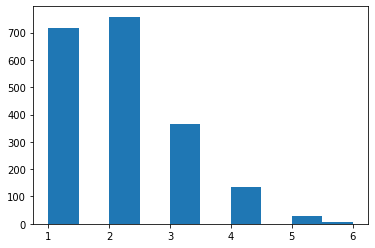

In [62]:
# Histograma da variável "N_contratos" 
plt.hist(x = df['n_contratos']);

# Transformação de Variáveis

In [63]:
df['data'].head()

0   2021-09-09
1   2020-11-07
2   2020-07-16
3   2021-05-12
4   2020-09-26
Name: data, dtype: datetime64[ns]

In [64]:
pd.to_datetime(df['data'],infer_datetime_format=True )

0      2021-09-09
1      2020-11-07
2      2020-07-16
3      2021-05-12
4      2020-09-26
          ...    
9995   2021-12-22
9996   2021-03-25
9997   2020-08-09
9998   2020-05-08
9999   2021-05-17
Name: data, Length: 10000, dtype: datetime64[ns]

# Tratamento de Variáveis Categóricas

In [65]:
# Utilizando label enconder
df.loc[df['tem_filhos'] == 'S', 'tem_filhos'] = 1
df.loc[df['tem_filhos'] == 'N', 'tem_filhos'] = 0

In [66]:
# Utilizando label enconder
df.loc[df['risco'] == 'Alto', 'risco'] = 3
df.loc[df['risco'] == 'Baixo', 'risco'] = 1
df.loc[df['risco']== 'Médio', 'risco'] = 2

In [67]:
df.head()

,Unnamed: 0,risco_credito,saldo_conta,idade,tem_filhos,risco,n_contratos,banco,taxa_emprestimo,valor_contratado,lucro_esperado,data,n_dependentes
0,0,0.874979,7731.0,31,1,2,NaN,A,0.740928,101.449573,70.422349,2021-09-09,0
1,1,0.909962,NaN,78,1,3,NaN,D,0.373933,80.963989,69.014723,2020-11-07,2
2,2,0.223025,1049.0,54,1,1,NaN,B,0.202436,8.649433,8.112917,2020-07-16,1
3,3,0.054422,5654.0,77,1,2,NaN,A,0.015751,7.297510,6.190525,2021-05-12,0
4,4,0.843362,3585.0,55,1,1,NaN,B,0.184674,89.795502,21.981938,2020-09-26,2


In [68]:

# Utilizando One hot enconder
df = pd.get_dummies(df,columns = ['banco'])

# Verificação de valores ausentes

In [69]:
# Verificação da soma dos valores nulos
df.isnull().sum()

Unnamed: 0             0
risco_credito          0
saldo_conta         5005
idade                  0
tem_filhos             0
risco                  0
n_contratos         7994
taxa_emprestimo        0
valor_contratado       0
lucro_esperado         0
data                   0
n_dependentes          0
banco_A                0
banco_B                0
banco_C                0
banco_D                0
dtype: int64

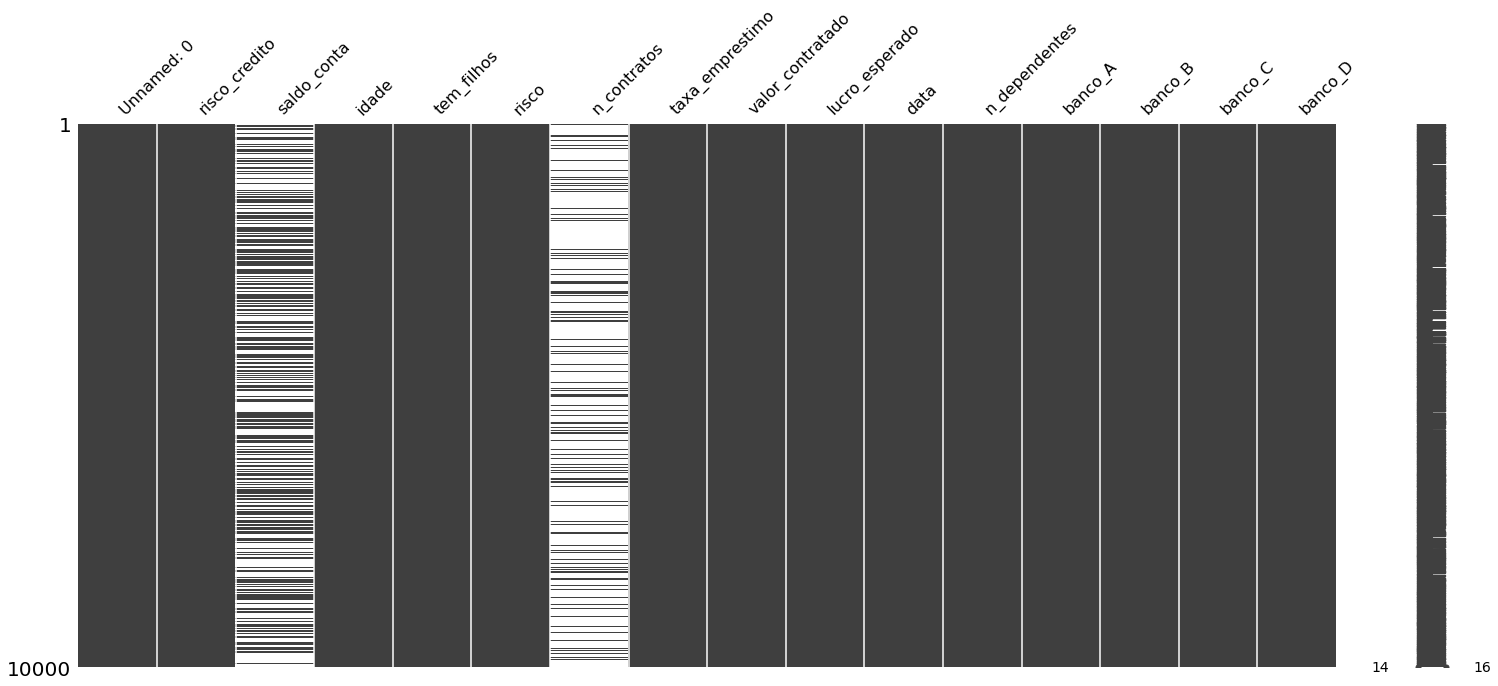

In [70]:
# Plotar a matriz de valores nulos - Biblioteca 'missingno'
msno.matrix(df);

In [71]:
# Substituição de valores ausentes por 0
df['n_contratos'] = df['n_contratos'].fillna(0)

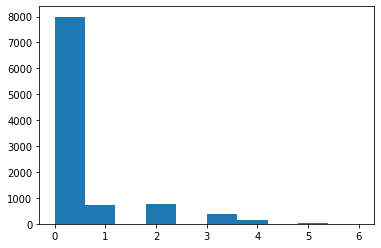

In [72]:
# Conta a frequencia de cada atributo
plt.hist(df['n_contratos']);

In [73]:
df['n_contratos'].value_counts()

0.0    7994
2.0     758
1.0     715
3.0     365
4.0     136
5.0      27
6.0       5
Name: n_contratos, dtype: int64

# Verificação de Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



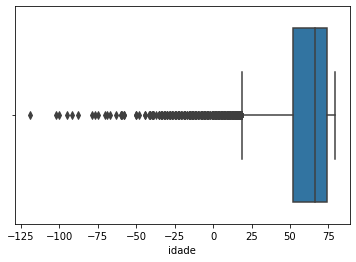

In [74]:
# Box-plot da coluna 'idade'

sns.boxplot(df['idade']);

In [75]:
# Intervalo interqualítico

superior_conta = df['saldo_conta'].mean() + 1.5*(9998-2494.25)
inferior_conta = df['saldo_conta'].mean() - 1.5*(9998-2494.25)

# Normalização dos dados

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        10000 non-null  int64         
 1   risco_credito     10000 non-null  float64       
 2   saldo_conta       4995 non-null   float64       
 3   idade             10000 non-null  int64         
 4   tem_filhos        10000 non-null  object        
 5   risco             10000 non-null  object        
 6   n_contratos       10000 non-null  float64       
 7   taxa_emprestimo   10000 non-null  float64       
 8   valor_contratado  10000 non-null  float64       
 9   lucro_esperado    10000 non-null  float64       
 10  data              10000 non-null  datetime64[ns]
 11  n_dependentes     10000 non-null  int64         
 12  banco_A           10000 non-null  uint8         
 13  banco_B           10000 non-null  uint8         
 14  banco_C           10000

In [77]:
df.head()

,Unnamed: 0,risco_credito,saldo_conta,idade,tem_filhos,risco,n_contratos,taxa_emprestimo,valor_contratado,lucro_esperado,data,n_dependentes,banco_A,banco_B,banco_C,banco_D
0,0,0.874979,7731.0,31,1,2,0.0,0.740928,101.449573,70.422349,2021-09-09,0,1,0,0,0
1,1,0.909962,NaN,78,1,3,0.0,0.373933,80.963989,69.014723,2020-11-07,2,0,0,0,1
2,2,0.223025,1049.0,54,1,1,0.0,0.202436,8.649433,8.112917,2020-07-16,1,0,1,0,0
3,3,0.054422,5654.0,77,1,2,0.0,0.015751,7.297510,6.190525,2021-05-12,0,1,0,0,0
4,4,0.843362,3585.0,55,1,1,0.0,0.184674,89.795502,21.981938,2020-09-26,2,0,1,0,0


In [78]:
x = df[['idade','n_contratos','risco','n_dependentes','tem_filhos','banco_A','banco_B','banco_C','banco_D','risco_credito','taxa_emprestimo','valor_contratado']]
y = df[['lucro_esperado']]

In [79]:
df.info()
df['taxa_emprestimo'] = df['taxa_emprestimo'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        10000 non-null  int64         
 1   risco_credito     10000 non-null  float64       
 2   saldo_conta       4995 non-null   float64       
 3   idade             10000 non-null  int64         
 4   tem_filhos        10000 non-null  object        
 5   risco             10000 non-null  object        
 6   n_contratos       10000 non-null  float64       
 7   taxa_emprestimo   10000 non-null  float64       
 8   valor_contratado  10000 non-null  float64       
 9   lucro_esperado    10000 non-null  float64       
 10  data              10000 non-null  datetime64[ns]
 11  n_dependentes     10000 non-null  int64         
 12  banco_A           10000 non-null  uint8         
 13  banco_B           10000 non-null  uint8         
 14  banco_C           10000

In [80]:
df.head()

,Unnamed: 0,risco_credito,saldo_conta,idade,tem_filhos,risco,n_contratos,taxa_emprestimo,valor_contratado,lucro_esperado,data,n_dependentes,banco_A,banco_B,banco_C,banco_D
0,0,0.874979,7731.0,31,1,2,0.0,0.740928,101.449573,70.422349,2021-09-09,0,1,0,0,0
1,1,0.909962,NaN,78,1,3,0.0,0.373933,80.963989,69.014723,2020-11-07,2,0,0,0,1
2,2,0.223025,1049.0,54,1,1,0.0,0.202436,8.649433,8.112917,2020-07-16,1,0,1,0,0
3,3,0.054422,5654.0,77,1,2,0.0,0.015751,7.297510,6.190525,2021-05-12,0,1,0,0,0
4,4,0.843362,3585.0,55,1,1,0.0,0.184674,89.795502,21.981938,2020-09-26,2,0,1,0,0


In [81]:
df['n_contratos'] = df['n_contratos'].astype('Int64')

In [82]:
normal = pd.DataFrame(StandardScaler().fit_transform(x))

In [83]:
x_train, x_test, y_train, y_test = train_test_split( normal,y, test_size=0.3, random_state = 10)


In [84]:
df['risco_credito']=pd.to_numeric(df['risco_credito'],errors = 'coerce')
df['taxa_emprestimo']=pd.to_numeric(df['taxa_emprestimo'],errors = 'coerce')
df['valor_contratado']=pd.to_numeric(df['valor_contratado'],errors = 'coerce')
df['lucro_esperado']=pd.to_numeric(df['lucro_esperado'],errors = 'coerce')

In [87]:
from sklearn.linear_model import LinearRegression 
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
regr.predict(x_test)

array([[ 9.11617798],
       [11.77334297],
       [23.25311748],
       ...,
       [35.41861606],
       [52.46004031],
       [46.93828834]])

In [89]:
regr.score(x_test,y_test)

0.490658937108188

In [90]:
regr.score(x_train,y_train)

0.48931060544801197

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        10000 non-null  int64         
 1   risco_credito     10000 non-null  float64       
 2   saldo_conta       4995 non-null   float64       
 3   idade             10000 non-null  int64         
 4   tem_filhos        10000 non-null  object        
 5   risco             10000 non-null  object        
 6   n_contratos       10000 non-null  Int64         
 7   taxa_emprestimo   10000 non-null  float64       
 8   valor_contratado  10000 non-null  float64       
 9   lucro_esperado    10000 non-null  float64       
 10  data              10000 non-null  datetime64[ns]
 11  n_dependentes     10000 non-null  int64         
 12  banco_A           10000 non-null  uint8         
 13  banco_B           10000 non-null  uint8         
 14  banco_C           10000

# Regressão Linear

# PCA

In [92]:
pca = PCA(n_components = 2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
# Taxa de variancia explicada
pca.explained_variance_ratio_

array([0.69422419, 0.30317201])

In [94]:
# Valor de cada componente
pca.singular_values_

array([3065.33482271, 2025.68819931])